<a href="https://colab.research.google.com/github/marielalvarez/actividad5/blob/main/ejercicio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

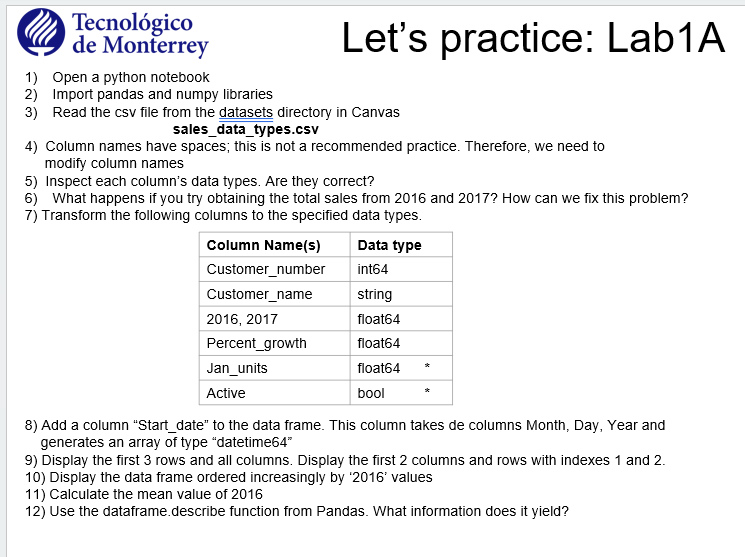

In [2]:
# 1), 2)
import pandas as pd
import numpy as np
# 3), 4)
# importing and modifying spaces in column names
data_sales = pd.read_csv('https://raw.githubusercontent.com/chris1610/pbpython/master/data/sales_data_types.csv',names=["Customer_Number", "Customer_Name", "2016", "2017", "Percent_Growth", "Jan_Units", "Month", "Day", "Year", "Active"], header=0 )
data_sales.head()

,Customer_Number,Customer_Name,2016,2017,Percent_Growth,Jan_Units,Month,Day,Year,Active
0,10002.0,Quest Industries,"$125,000.00",$162500.00,30.00%,500,1,10,2015,Y
1,552278.0,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700,6,15,2014,Y
2,23477.0,ACME Industrial,"$50,000.00",$62500.00,25.00%,125,3,29,2016,Y
3,24900.0,Brekke LTD,"$350,000.00",$490000.00,4.00%,75,10,27,2015,Y
4,651029.0,Harbor Co,"$15,000.00",$12750.00,-15.00%,Closed,2,2,2014,N


In [3]:
# 5)
data_sales.dtypes
# data types are incorrect

,0
Customer_Number,float64
Customer_Name,object
2016,object
2017,object
Percent_Growth,object
Jan_Units,object
Month,int64
Day,int64
Year,int64
Active,object


In [4]:
# 6)
print('Total 2016: ', data_sales['2016'].sum())
print('Total 2017: ', data_sales['2017'].sum())
# the sum is incorrect as python is not treating the data types as numbers

Total 2016:  $125,000.00$920,000.00$50,000.00$350,000.00$15,000.00
Total 2017:  $162500.00$101,2000.00$62500.00$490000.00$12750.00


In [5]:
# 7)
data_sales["Customer_Number"] = data_sales["Customer_Number"].astype("int64")
data_sales["2016"] = data_sales["2016"].replace('[\$,]', '', regex=True).astype("float64")
data_sales["2017"] = data_sales["2017"].replace('[\$,]', '', regex=True).astype("float64")
data_sales["Percent_Growth"] = data_sales["Percent_Growth"].replace('%', '', regex=True).astype("float64")
data_sales["Jan_Units"] = pd.to_numeric(data_sales["Jan_Units"], errors='coerce')
data_sales["Active"] = data_sales["Active"].astype(str).map({"Y": True, "N": False})
data_sales.head()

,Customer_Number,Customer_Name,2016,2017,Percent_Growth,Jan_Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,30.0,500.0,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700.0,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,25.0,125.0,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,4.0,75.0,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-15.0,NaN,2,2,2014,False


In [6]:
# 8)
data_sales["Start_date"] = pd.to_datetime(data_sales[["Year", "Month", "Day"]])

In [7]:
# 9)
data_sales.head(3)


,Customer_Number,Customer_Name,2016,2017,Percent_Growth,Jan_Units,Month,Day,Year,Active,Start_date
0,10002,Quest Industries,125000.0,162500.0,30.0,500.0,1,10,2015,True,2015-01-10
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700.0,6,15,2014,True,2014-06-15
2,23477,ACME Industrial,50000.0,62500.0,25.0,125.0,3,29,2016,True,2016-03-29


In [8]:
# 9)
data_sales.iloc[1:3, 0:2]

,Customer_Number,Customer_Name
1,552278,Smith Plumbing
2,23477,ACME Industrial


In [9]:
#10)
data_sales.sort_values(by="2016", ascending=True)

,Customer_Number,Customer_Name,2016,2017,Percent_Growth,Jan_Units,Month,Day,Year,Active,Start_date
4,651029,Harbor Co,15000.0,12750.0,-15.0,NaN,2,2,2014,False,2014-02-02
2,23477,ACME Industrial,50000.0,62500.0,25.0,125.0,3,29,2016,True,2016-03-29
0,10002,Quest Industries,125000.0,162500.0,30.0,500.0,1,10,2015,True,2015-01-10
3,24900,Brekke LTD,350000.0,490000.0,4.0,75.0,10,27,2015,True,2015-10-27
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700.0,6,15,2014,True,2014-06-15


In [11]:
#11)
data_sales["2016"].mean()

292000.0

In [12]:
# 12)
data_sales.describe()

,Customer_Number,2016,2017,Percent_Growth,Jan_Units,Month,Day,Year,Start_date
count,5.000000,5.000000,5.000000e+00,5.000000,4.000000,5.000000,5.000000,5.00000,5
mean,252337.200000,292000.000000,3.479500e+05,10.800000,350.000000,4.400000,16.600000,2014.80000,2015-02-15 14:24:00
min,10002.000000,15000.000000,1.275000e+04,-15.000000,75.000000,1.000000,2.000000,2014.00000,2014-02-02 00:00:00
25%,23477.000000,50000.000000,6.250000e+04,4.000000,112.500000,2.000000,10.000000,2014.00000,2014-06-15 00:00:00
50%,24900.000000,125000.000000,1.625000e+05,10.000000,312.500000,3.000000,15.000000,2015.00000,2015-01-10 00:00:00
75%,552278.000000,350000.000000,4.900000e+05,25.000000,550.000000,6.000000,27.000000,2015.00000,2015-10-27 00:00:00
max,651029.000000,920000.000000,1.012000e+06,30.000000,700.000000,10.000000,29.000000,2016.00000,2016-03-29 00:00:00
std,320838.999788,374476.300986,4.151425e+05,17.908099,300.693643,3.646917,11.414903,0.83666,NaN


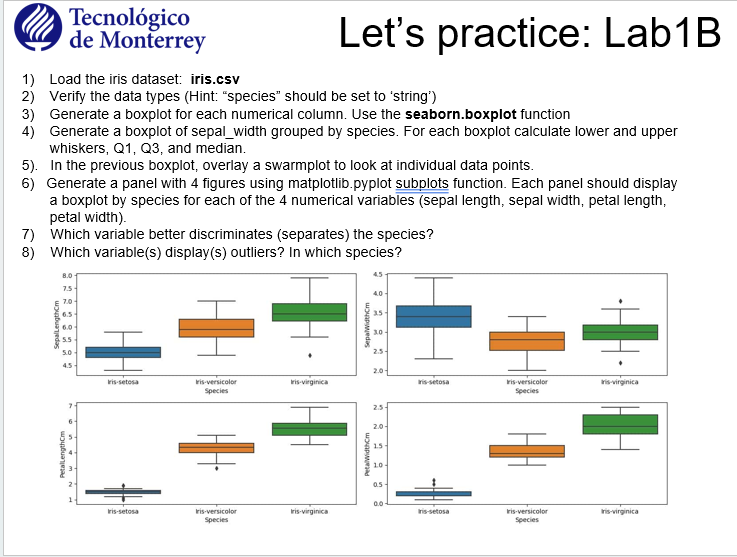

In [19]:
# 1)
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
# 2)
iris["variety"] = iris["variety"].astype(str)
iris.dtypes

,0
sepal.length,float64
sepal.width,float64
petal.length,float64
petal.width,float64
variety,object


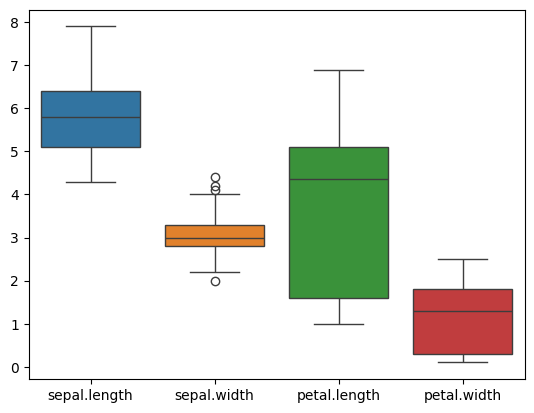

In [20]:
#3)
import seaborn as sns
boxplot_all = sns.boxplot(data=iris)


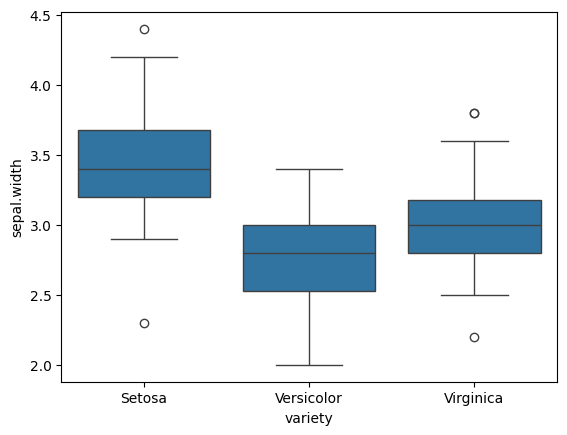

In [22]:
# 4)
boxplot_sepal_width = sns.boxplot(x="variety", y="sepal.width", data=iris)

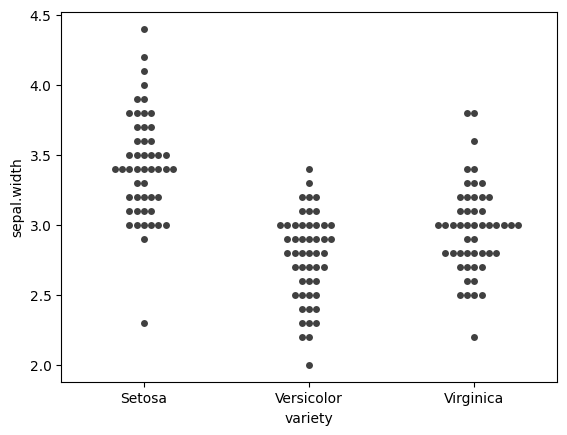

In [23]:
# 5)
swarmplot_sepal_width = sns.swarmplot(x="variety", y="sepal.width", data=iris, color=".25")

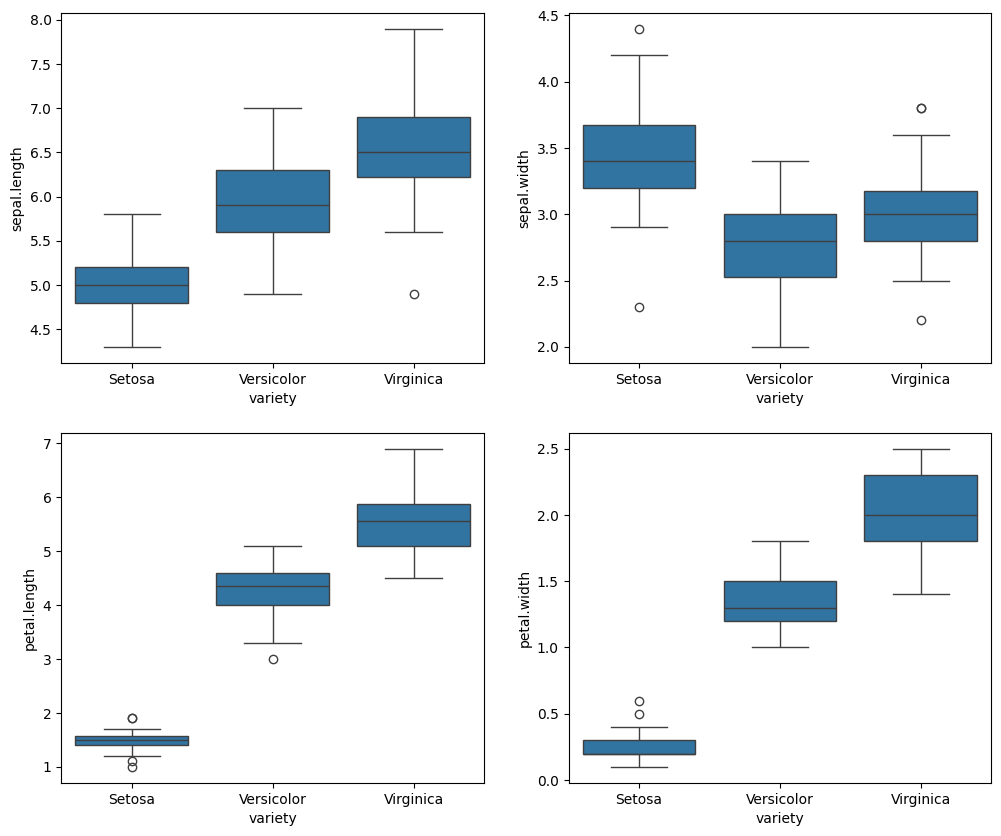

In [26]:
# 6) Generate a panel with 4 figures using subplots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
variables = ["sepal.length", "sepal.width", "petal.length", "petal.width"]
for ax, var in zip(axes.flatten(), variables):
    sns.boxplot(x="variety", y=var, data=iris, ax=ax)

In [28]:
# 7)
iris.groupby("variety").mean()
# the variables that separetes species the most are petal length and petal width.

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [34]:
# 8)
'''By observing the visualizaitions, the variables sepal.width, petal.length, petal.width in Setosa display outliers.
For Varsicolor species, only petal.length encounters outliers.
Finally, sepal.lengtH, sepal.width display ourtliers for Virginica.'''